In [19]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd

In [20]:
tickers = ['AAPL', 'MSFT', 'TWTR','IBM']
start = dt.datetime(2020,1,1)

data = pdr.get_data_yahoo(tickers,start)

In [21]:
data = data['Adj Close']

In [23]:
lreturns = np.log(data/data.shift())

In [24]:
lreturns

Symbols,AAPL,MSFT,TWTR,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009769,-0.012530,-0.024445,-0.008007
2020-01-06,0.007937,0.002581,0.003800,-0.001788
2020-01-07,-0.004714,-0.009160,0.028048,0.000671
2020-01-08,0.015958,0.015803,0.015551,0.008312
...,...,...,...,...
2021-09-14,-0.009608,0.009384,0.008844,-0.014069
2021-09-15,0.006125,0.016639,0.027044,0.007168
2021-09-16,-0.001612,0.001311,0.007251,-0.005628


In [25]:
weights = np.random.random(4)
weights /=weights.sum()

array([0.09629915, 0.19811164, 0.32017936, 0.38540984])

In [26]:
expected_rtn = np.sum(log_returns.mean()* weight)*252

In [27]:
expected_rtn

0.24515713636424477

In [28]:
expected_vol = np.sqrt(np.dot(weight, np.dot(log_returns.cov()*252, weight)))

In [29]:
sratio = expected_rtn/expected_vol

In [30]:
sratio

0.7248896190924173

In [31]:
n = 5000
weights = np.zeros((n,4))
expected_rtns = np.zeros(n)
expected_vols = np.zeros(n)
sratios = np.zeros(n)

for i in range (n):
    weights = np.random.random(4)
    weights /=weights.sum()
    weights[i] = weights
    
    expected_rtns[i] = np.sum(lreturns.mean()* weights)*252
    expected_vols[i] = np.sqrt(np.dot(weights, np.dot(lreturns.cov()*252, weights)))
    sratios[i] = expected_rtns[i]/expected_vols[i]

In [32]:
sratios.max()

1.0426065160564695

In [33]:
sratios.argmax()

4556

In [38]:
weights[4556]

array([0.35719375, 0.56700112, 0.0727036 , 0.00310154])

In [35]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


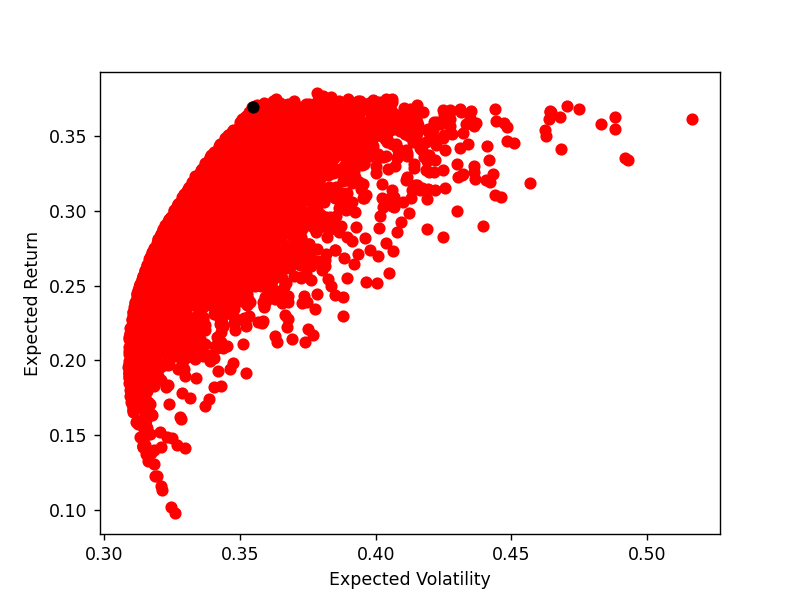

Text(0, 0.5, 'Expected Return')

In [40]:
fix, ax = plt.subplots()
ax.scatter(expected_vols,expected_rtns, c='red')
ax.scatter(expected_vols[sratios.argmax()], expected_rtns[sratios.argmax()],c='black')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')